In [3]:
import os
import ROOT
from itertools import product

Welcome to JupyROOT 6.28/04


In [11]:
ERA = "2017"
MEASURE = "electron"
isQCD = True

In [12]:
ptCorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptCorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptCorr_bins = [10., 15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.579, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

In [13]:
if not isQCD:
    file_path = f"results/{ERA}/ROOT/{MEASURE}/fakerate.root" 
else:
    file_path = f"results/{ERA}/ROOT/{MEASURE}/fakerate_qcd.root"
assert os.path.exists(file_path)
f = ROOT.TFile.Open(file_path)
h = f.Get("fakerate")

for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta+1e-5, ptCorr+1e-5)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

0.0 10.0 0.667119384286138 0.0162428246804176 2.434770306936666
0.0 15.0 0.4368154721501865 0.0262390727746028 6.006900956470985
0.0 20.0 0.3074482652490398 0.0320384508358644 10.420761623069351
0.0 25.0 0.1716953060948199 0.0198668374685648 11.570984624118498
0.0 35.0 0.1087252818609211 0.0163137233287338 15.004535329328409
0.0 50.0 0.1443360246856578 0.0277452965286481 19.22271074672674
0.8 10.0 0.7027251262398837 0.0264921147684549 3.769911417599077
0.8 15.0 0.4641094399671979 0.0309269595465408 6.663721287101302
0.8 20.0 0.2743768763441763 0.0318539167819947 11.609548591127405
0.8 25.0 0.2110901091374497 0.0245506110953589 11.630393861501565
0.8 35.0 0.1821671953903342 0.0267972505551363 14.71025038164372
0.8 50.0 0.1966943166787593 0.0330803653369805 16.818160227276557
1.579 10.0 0.6782151094065707 0.0343655177817527 5.067052813350336
1.579 15.0 0.5078778111532808 0.0399806339153371 7.872096996037239
1.579 20.0 0.3531477290514256 0.0321386632214219 9.100628597484722
1.579 25.0 0.2

In [14]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

In [15]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [16]:
# prepare histograms
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

title = ""
if MEASURE == "muon":     title = "fake rate (#mu)"
if MEASURE == "electron": title = "fake rate (e)"
for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    #hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle(title)


legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

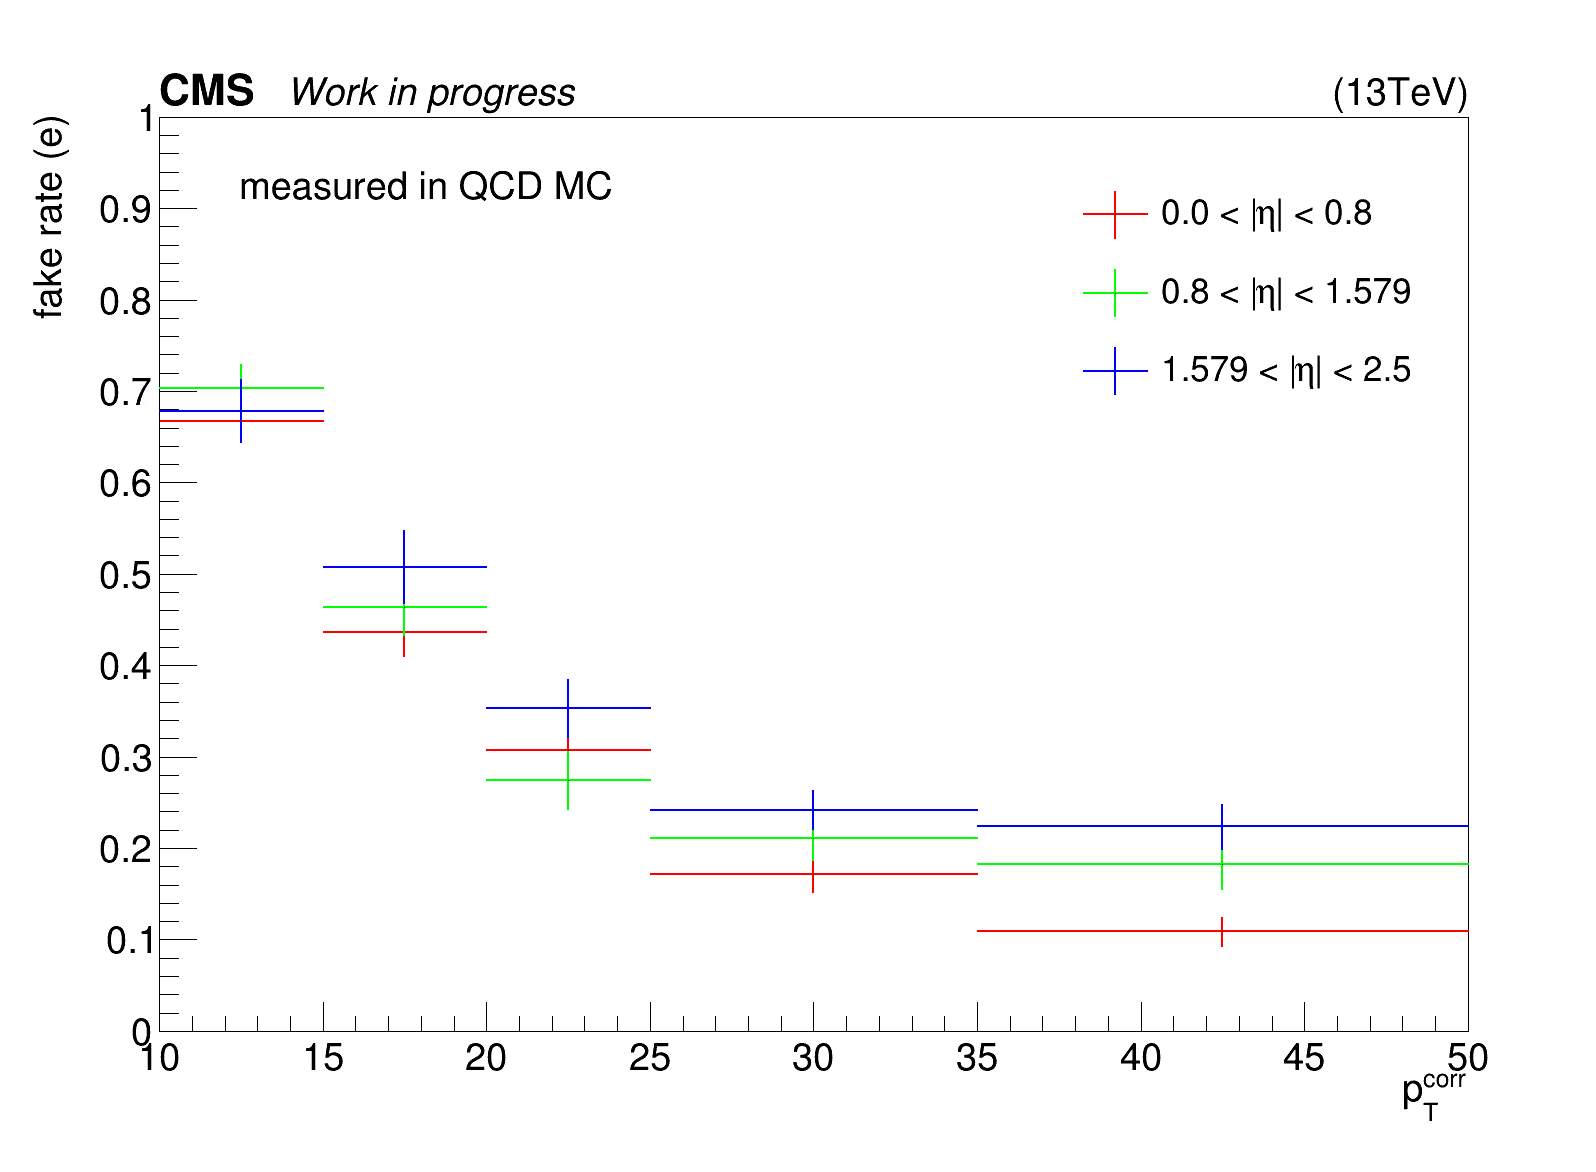

In [19]:
canvas.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
if isQCD:
    setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.83, "measured in QCD MC")


canvas.Draw()